# EDA


In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Reading prepared data into a dataframe.
df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS
DATE,,,,,,,,,,
2002-01-01,117.144,2002,1,50091.000000,1.825664e+08,1632.0,205.1,5.7,142.0,1.73
2002-02-01,117.845,2002,2,50156.000000,1.827984e+08,1671.0,206.0,5.7,142.2,1.74
2002-03-01,118.687,2002,3,50221.000000,1.830783e+08,1559.0,206.3,5.7,143.2,1.73
2002-04-01,119.611,2002,4,50286.000000,1.832605e+08,1625.0,207.0,5.9,143.5,1.75
2002-05-01,120.724,2002,5,50311.333333,1.835082e+08,1705.0,207.4,5.8,143.8,1.75


We dont need month and year columns for our analysis so we are gonna drop it 

In [3]:
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)

First we will see correlation between all features 

In [4]:
# Correlation
df.corr()

,CSUSHPISA,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS
CSUSHPISA,1.000000,0.917873,0.642338,0.209174,0.890775,-0.512337,0.920002,0.284548
Per_Capita_GDP,0.917873,1.000000,0.855210,-0.061822,0.973358,-0.471342,0.930651,0.068829
Working_Population,0.642338,0.855210,1.000000,-0.505890,0.881400,-0.131772,0.794638,-0.224273
Houses,0.209174,-0.061822,-0.505890,1.000000,-0.171440,-0.558396,-0.145780,0.658246
CPI,0.890775,0.973358,0.881400,-0.171440,1.000000,-0.328392,0.942186,-0.027740
UNRATE,-0.512337,-0.471342,-0.131772,-0.558396,-0.328392,1.000000,-0.314488,-0.547038
Cons_Materials,0.920002,0.930651,0.794638,-0.145780,0.942186,-0.314488,1.000000,-0.006130
FEDFUNDS,0.284548,0.068829,-0.224273,0.658246,-0.027740,-0.547038,-0.006130,1.000000


In [9]:
# Separating the target variable and the independent variable
y = df.pop("CSUSHPISA")
X = df

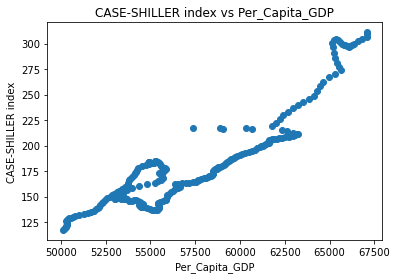

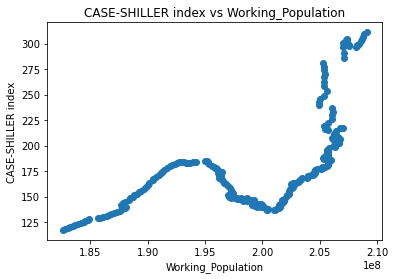

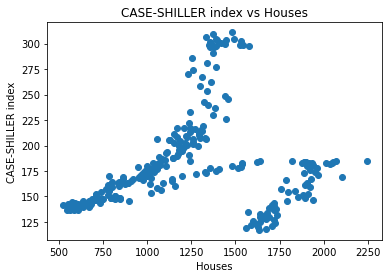

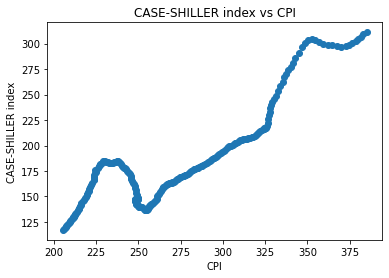

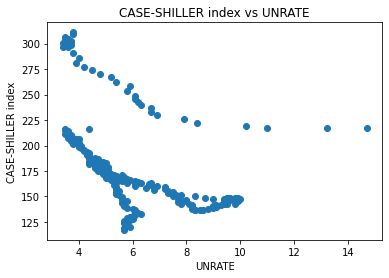

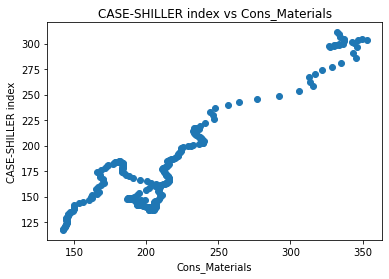

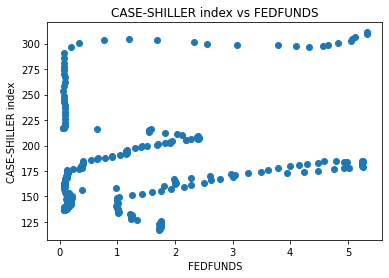

In [10]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

From the correlation matrix and the scatter plots, the following conclusions can be made-

Unemployment rate is negatively correlated with the home prices. Which makes sense.
Number of new houses has almost 0 correlation. This is unexpected as one would think that the number of houses supplied should also affect home prices. Maybe the number of new houses built are not enough to bring the prices down significantly.
Impact of the great recession is reflected in almost all the plots.
Interest rates have a slight negative impact on the home prices.
All the other variables are positively correlated with the home prices.

# Model Building



After analysing the data I have concluded that we should use Linear regression as most of the variables have very high correlation with target variable 

In [12]:
# Scaling
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [15]:
# Splitting data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.3, random_state= 42)

In [16]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = r2_score(pred, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.9858420435200752


The R2 score is close to 1 which shows model accuracy is good but there may be case of overfitting because size of data is small 

In [17]:
#Printing the regression coefficients of different variables
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for Per_Capita_GDP is 16.829113348792557
The coefficient for Working_Population is 14.274334552192997
The coefficient for Houses is 67.3148992935699
The coefficient for CPI is 38.13352205951474
The coefficient for UNRATE is 20.35448483857702
The coefficient for Cons_Materials is 129.87375550197834
The coefficient for FEDFUNDS is 17.98354464113498


In [18]:
# The intercept
print("The intercept is: ", model.intercept_)

The intercept is:  70.13133151042183


The coefficients of the variables are not in sync with their correlation coefficients with the target variable. For example, the coefficient of "UNRATE" (unemployment rate) is positive. It does not make sense as a rise in unemployment will surely lead to a decrease in the home prices. So, the question arises, why did this happen?

I found the answer on [https://www.researchgate.net/post/What-does-it-indicating-If-there-is-positive-correlation-but-negative-regression-coefficient] .

"... reason is what some call "real suppression". In this case suppression occurs because an important predictor variable, necessary in understanding the true relationship between the latent variables, suppresses the effect of another predictor variable."

As most variable increase with time. So, it is expected that they will have high correlation. So, instead of depending upon the linear model, we can directly study the impact of variables on the home price index using the scatter plots.

A few variables that could have been studied are below.

-Net-immigration (It is supposed to have a positive impact. No suitable data could be found)
-Marriage Rate (People tend to buy homes after they get married. So, it might have some effect. No data could be found)
-Average house size (The data was available only for the years after 2015. Though it is expected that an increase in the average house size would increase prices, it is found that the average home size has been consistently decreasing although the prica has been increasing)
-Land availability (Less land, higher prices. Perhaps this is why the prices has been rising even though the average house size has been decreasing. No relevant data could be found)
-Tax Rate (Too many brackets (7) and could not analyse due to time)
-Number of active listings (Data prior to 2017 was not found)